# Análise palavras fontes de dados

In [1]:
from explore.informacoes_fontes_dados import obter_informacoes_palavras
from explore.estatistica_palavras import AnaliseEstatisticaPalavras
from explore.grafico_palavras import AnaliseGraficaPalavras
from explore.nuvem_palavras import AnaliseNuvemPalavras

from util import constants

In [2]:
import seaborn as sns
sns.set_theme()

## Análises gráficas de palavras de fontes de dados

## Análise palavras - Nerds Viajantes

In [3]:
informacoes_fonte_de_dados = obter_informacoes_palavras(constants.NERDS_VIAJANTES)

In [4]:
informacoes_fonte_de_dados.head(5)

,documento,tamanho,documento_nao_verbo,tamanho_sem_verbo,percentual_nao_verbo,documento_nao_verbo_sw,tamanho_sem_verbo_sw,percentual_nao_verbo_sw
0,"[prim, dia, santiag, tent, visit, mus, art, pr...",197,"[dia, santiag, mus, art, pré, colombi, vár, me...",117,59.390863,"[santiag, mus, art, pré, colombi, vár, mes, pe...",109,55.329949
1,"[sext, feir, santiag, ped, restaurant, bacan, ...",190,"[santiag, restaurant, bacan, dentr, opç, diver...",118,62.105263,"[santiag, bacan, dentr, opç, divers, blog, aqu...",105,55.263158
2,"[palaci, moned, soment, moned, sed, govern, ch...",147,"[palaci, moned, soment, moned, chilen, santiag...",75,51.020408,"[palaci, moned, soment, moned, chilen, santiag...",73,49.659864
3,"[inaugur, hoj, seç, revel, fot, tod, seman, po...",119,"[hoj, seç, fot, tod, seman, fot, fot, câm, alg...",64,53.781513,"[hoj, seç, seman, câm, ent, últ, chil, argenti...",54,45.378151
4,"[monument, valley, reg, est, unid, fic, dentr,...",113,"[monument, valley, unid, dentr, indígen, trib,...",59,52.212389,"[monument, valley, unid, dentr, indígen, trib,...",51,45.132743


## Análise fonte de dados selecionada

In [5]:
analise_grafica = AnaliseGraficaPalavras(informacoes_fonte_de_dados)

### Distribuição de percentuais de tokens não verbo no documento

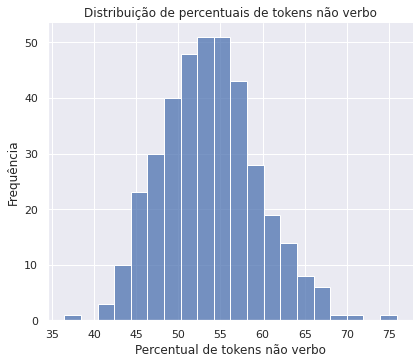

In [6]:
analise_grafica.analisar_distribuicao_percentual('percentual_nao_verbo', xlabel="Percentual de tokens não verbo", 
    ylabel="Frequência", title='Distribuição de percentuais de tokens não verbo')

### Distribuição de percentuais de tokens não verbo nem stopwords no documento

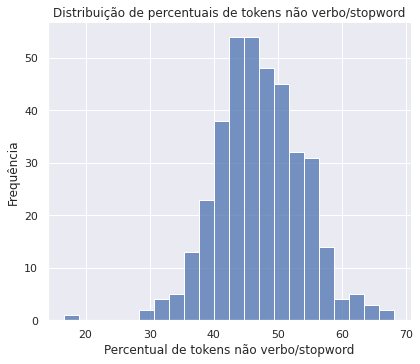

In [7]:
analise_grafica.analisar_distribuicao_percentual('percentual_nao_verbo_sw', xlabel="Percentual de tokens não verbo/stopword", ylabel="Frequência", 
    title='Distribuição de percentuais de tokens não verbo/stopword')

### Distribuição de tamanho de documento

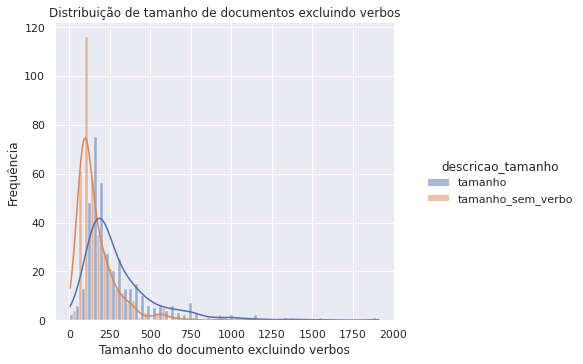

In [9]:
analise_grafica.analisar_distribuicao_tamanhos_documentos('tamanho_sem_verbo', xlabel='Tamanho do documento excluindo verbos', 
    ylabel='Frequência', title='Distribuição de tamanho de documentos excluindo verbos')

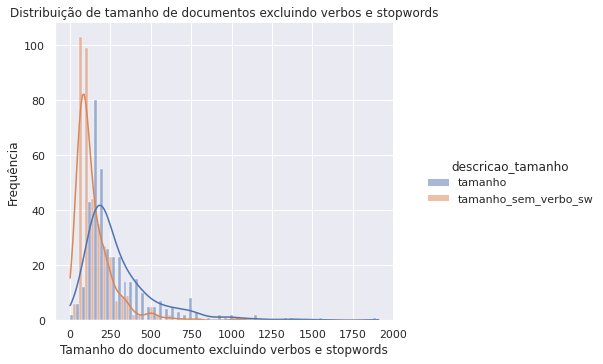

In [10]:
analise_grafica.analisar_distribuicao_tamanhos_documentos('tamanho_sem_verbo_sw', xlabel='Tamanho do documento excluindo verbos e stopwords', 
    ylabel='Frequência', title='Distribuição de tamanho de documentos excluindo verbos e stopwords')

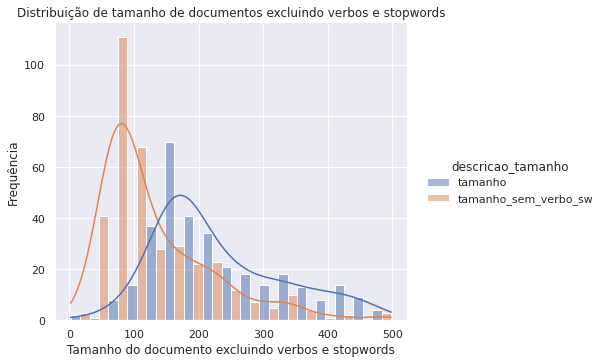

In [11]:
analise_grafica.analisar_distribuicao_tamanhos_documentos('tamanho_sem_verbo_sw', xlabel='Tamanho do documento excluindo verbos e stopwords', 
    ylabel='Frequência', title='Distribuição de tamanho de documentos excluindo verbos e stopwords', x_max=500)

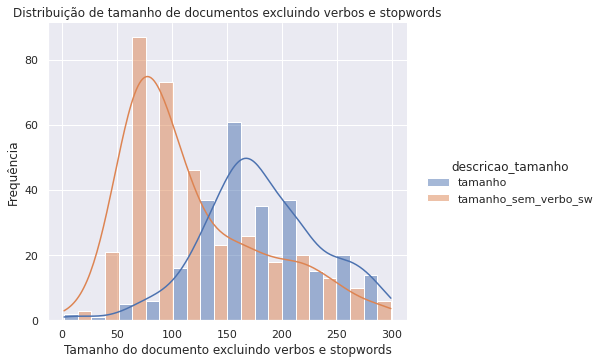

In [12]:
analise_grafica.analisar_distribuicao_tamanhos_documentos('tamanho_sem_verbo_sw', xlabel='Tamanho do documento excluindo verbos e stopwords', 
    ylabel='Frequência', title='Distribuição de tamanho de documentos excluindo verbos e stopwords', x_max=300)

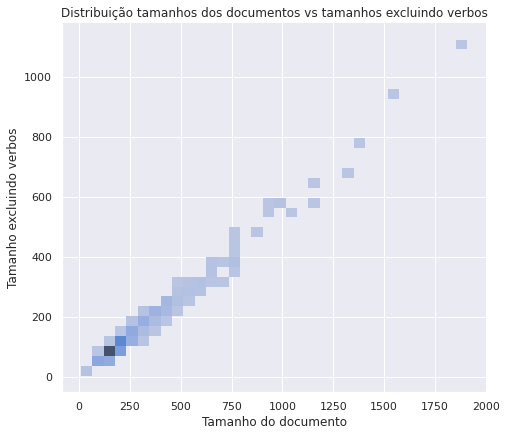

In [13]:
analise_grafica.analisar_distribuicao_tamanhos_documentos(coluna_tamanho='tamanho_sem_verbo', bidimensional=True, 
xlabel='Tamanho do documento', ylabel='Tamanho excluindo verbos', 
title='Distribuição tamanhos dos documentos vs tamanhos excluindo verbos')

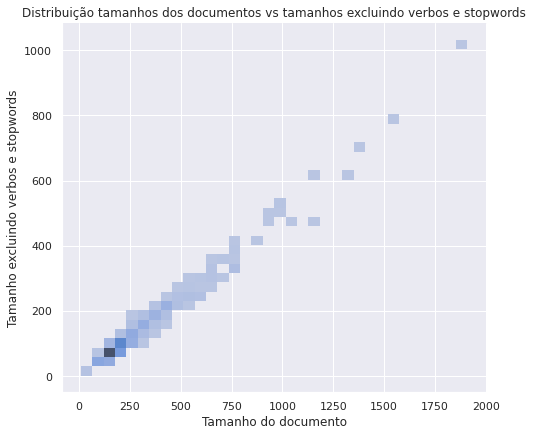

In [14]:
analise_grafica.analisar_distribuicao_tamanhos_documentos(coluna_tamanho='tamanho_sem_verbo_sw', bidimensional=True, 
xlabel='Tamanho do documento', ylabel='Tamanho excluindo verbos e stopwords', 
title='Distribuição tamanhos dos documentos vs tamanhos excluindo verbos e stopwords')

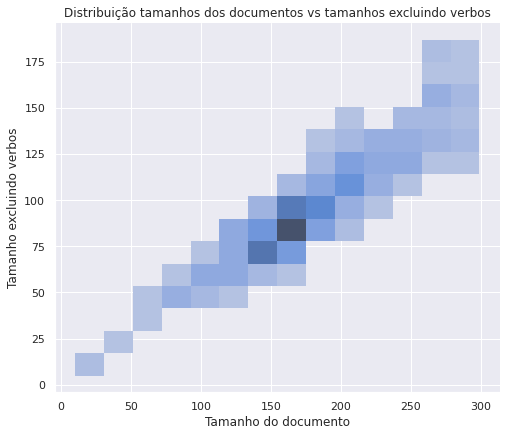

In [15]:
analise_grafica.analisar_distribuicao_tamanhos_documentos(coluna_tamanho='tamanho_sem_verbo', bidimensional=True, x_max=300, 
xlabel='Tamanho do documento', ylabel='Tamanho excluindo verbos', 
title='Distribuição tamanhos dos documentos vs tamanhos excluindo verbos')

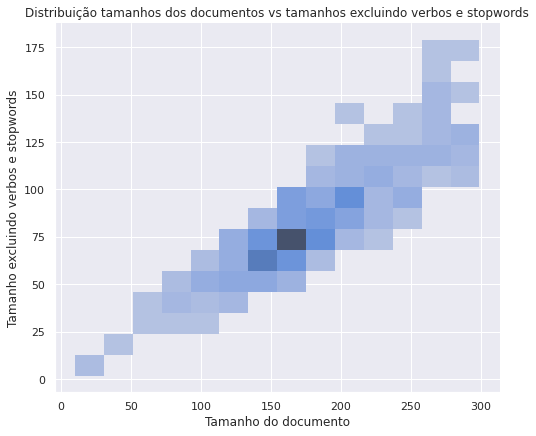

In [16]:
analise_grafica.analisar_distribuicao_tamanhos_documentos(coluna_tamanho='tamanho_sem_verbo_sw', bidimensional=True, x_max=300, 
xlabel='Tamanho do documento', ylabel='Tamanho excluindo verbos e stopwords', 
title='Distribuição tamanhos dos documentos vs tamanhos excluindo verbos e stopwords')

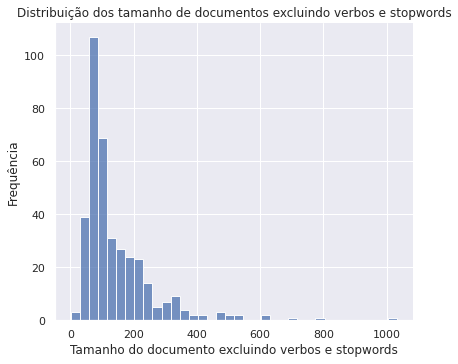

In [19]:
analise_grafica.analisar_distribuicao_tamanhos(indicador_tamanho='tamanho_sem_verbo_sw', 
    xlabel="Tamanho do documento excluindo verbos e stopwords", ylabel="Frequência", 
    title="Distribuição dos tamanho de documentos excluindo verbos e stopwords")

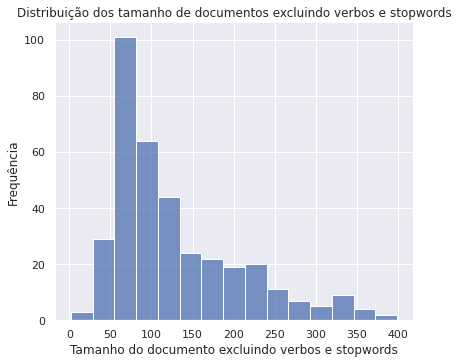

In [20]:
analise_grafica.analisar_distribuicao_tamanhos(indicador_tamanho='tamanho_sem_verbo_sw', x_max=400, 
    xlabel="Tamanho do documento excluindo verbos e stopwords", ylabel="Frequência", 
    title="Distribuição dos tamanho de documentos excluindo verbos e stopwords")

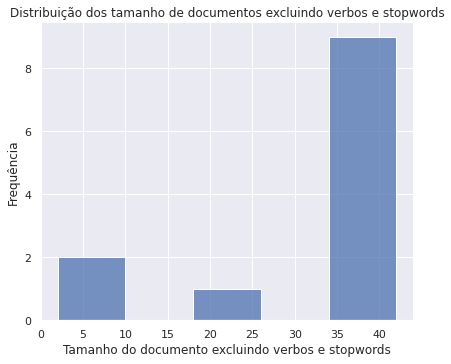

In [27]:
analise_grafica.analisar_distribuicao_tamanhos(indicador_tamanho='tamanho_sem_verbo_sw', x_max=42, 
    xlabel="Tamanho do documento excluindo verbos e stopwords", ylabel="Frequência", 
    title="Distribuição dos tamanho de documentos excluindo verbos e stopwords")

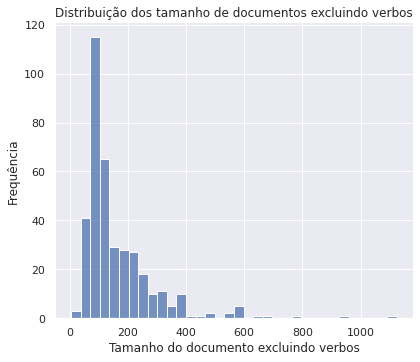

In [22]:
analise_grafica.analisar_distribuicao_tamanhos(indicador_tamanho='tamanho_sem_verbo', 
    xlabel="Tamanho do documento excluindo verbos", ylabel="Frequência", 
    title="Distribuição dos tamanho de documentos excluindo verbos")

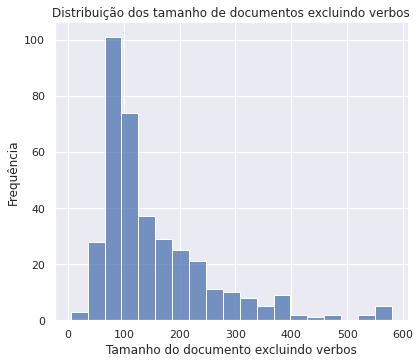

In [23]:
analise_grafica.analisar_distribuicao_tamanhos(indicador_tamanho='tamanho_sem_verbo', x_max=600, 
    xlabel="Tamanho do documento excluindo verbos", ylabel="Frequência", 
    title="Distribuição dos tamanho de documentos excluindo verbos")

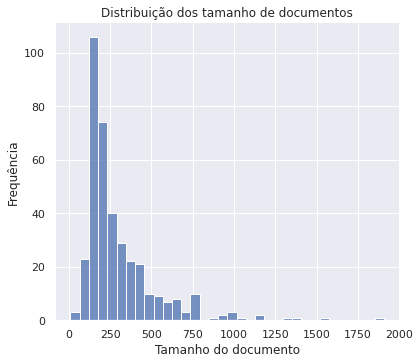

In [24]:
analise_grafica.analisar_distribuicao_tamanhos(xlabel="Tamanho do documento", ylabel="Frequência", 
    title="Distribuição dos tamanho de documentos")

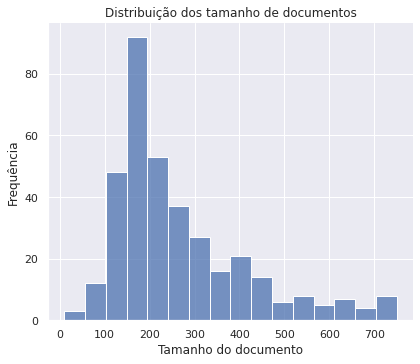

In [25]:
analise_grafica.analisar_distribuicao_tamanhos(x_max=750, xlabel="Tamanho do documento", ylabel="Frequência", 
    title="Distribuição dos tamanho de documentos")

## Análise estatística da fonte selecionada

In [ ]:
analise_estatistica = AnaliseEstatisticaPalavras(informacoes_fonte_de_dados)

### Contagem geral de tokens

In [ ]:
analise_estatistica.exibir_total_tokens('documento')

In [ ]:
analise_estatistica.exibir_total_tokens('documento_nao_verbo')

In [ ]:
analise_estatistica.exibir_total_tokens('documento_nao_verbo_sw')

### Exibição de tokens mais frequentes

#### 10 tokens mais frequentes

In [ ]:
print('10 Tokens mais comuns entre todos os tokens:')
analise_estatistica.exibir_tokens_mais_comuns('documento')

print('10 Tokens mais comuns eliminando os verbos:')
analise_estatistica.exibir_tokens_mais_comuns('documento_nao_verbo')

print('10 Tokens mais comuns eliminando os verbos e as stopwords customizadas:')
analise_estatistica.exibir_tokens_mais_comuns('documento_nao_verbo_sw')

#### 20 tokens mais frequentes

In [ ]:
print('20 Tokens mais comuns entre todos os tokens:')
analise_estatistica.exibir_tokens_mais_comuns('documento', n=20)

print('20 Tokens mais comuns eliminando os verbos:')
analise_estatistica.exibir_tokens_mais_comuns('documento_nao_verbo', n=20)

print('20 Tokens mais comuns eliminando os verbos e as stopwords customizadas:')
analise_estatistica.exibir_tokens_mais_comuns('documento_nao_verbo_sw', n=20)

### Descrição estatística dos tamanhos dos documentos

In [ ]:
analise_estatistica.analisar_tamanhos_documentos()

## Nuvem de palavras

In [ ]:
analise_nuvem_palavras = AnaliseNuvemPalavras(informacoes_fonte_de_dados)

## Nuvem de palavras da fonte selecionada

In [ ]:
analise_nuvem_palavras.gerar_nuvem_palavras('documento_nao_verbo_sw')

In [ ]:
analise_nuvem_palavras.gerar_nuvem_palavras('documento_nao_verbo')

In [ ]:
analise_nuvem_palavras.gerar_nuvem_palavras('documento')

## Análise de 100 palavras que mais aparecem

In [ ]:
documentos = informacoes_fonte_de_dados['documento'].values

In [ ]:
documentos[:5]